In [1]:
import pandas as pd
import numpy as np
from helper_functions.clean_transitions import clean_transition_column
from helper_functions.simulate_game import simulate_game
from helper_functions.combine_matrices import combine_team_matrix
import time
from matplotlib import pyplot as plt

In [2]:
#if one team does not have data for a certain starting state, we will get a row of nan's which will break the code.
#if this occurs, we can just substitute the average probability for this row?
avg_matrix = pd.read_excel('avg_transition_matrix_with_manual_edits.xlsx', sheet_name = 'Mean Pasted', index_col='Starting_State')

In [177]:
team_A = pd.read_excel("team_specific_matrix/Nevada_A.xlsx", index_col = 'Starting_State')
team_B = pd.read_excel("team_specific_matrix/Fresno St._B.xlsx", index_col = 'Starting_State')

In [178]:
transition_matrix = combine_team_matrix(team_A, team_B)

In [179]:
abc = simulate_game(transition_matrix, num_games=500)

In [180]:
OU = 137.5
team_A_margin = 17.5

In [181]:
totals = []
for item in abc[1]:
    totals.append(item[0]+item[1])

In [182]:
t_array = np.array(totals)-10

In [183]:
np.mean(t_array<OU)

0.194

In [184]:
np.mean(t_array>OU)

0.806

In [185]:
margins = []
for aaa in abc[1]:
    margins.append(aaa[0]-aaa[1])

In [186]:
margins_b = []
for aaa in abc[1]:
    margins_b.append(aaa[1]-aaa[0])

In [187]:
np.mean(np.array(margins)>team_A_margin)

0.148

In [188]:
np.mean(np.array(margins_b) > -team_A_margin)

0.852

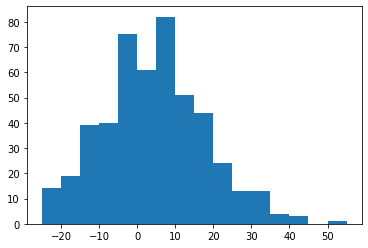

In [189]:
plt.hist(margins, bins=np.linspace(-25,55,17));

In [190]:
np.mean(margins)

3.064

In [191]:
np.median(margins)

4.0

In [192]:
np.mean([x[0]>x[1] for x in abc[1]])

0.592